In [1]:
from sklearn.svm import SVC
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [2]:
# Diviser la base de données en 70% pour l’apprentissage (training) et le reste pour les tests. 
trainsize=0.7
size=10000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

In [3]:
# EN se basant sur les fonctions usuelles :
# classifier = svm.SVC()
# classifier.fit()
# predicted = classifier.predict()
# Construire un modèle de classification ayant comme paramètres un noyau
# linear: clsvm = svm.SVC(kernel=’linear’). 
start=time.time()
clf = SVC(kernel='linear',gamma='scale')
clf.fit(xtrain, ytrain)
score=clf.score(xtest,ytest)
length=time.time()-start
print("Avec "+str(size)+" echantillons : Taux de réussite="+str(score)+", temps d'éxecution : "+str(length)+" secondes")

Avec 10000 echantillons : Taux de réussite=0.9173333333333333, temps d'éxecution : 12.772732257843018 secondes


with kernel=linear, Precision=0.9173333333333333, exec time=12.732718467712402, Recall=0.9156894131776971
with kernel=poly, Precision=0.947, exec time=19.58577060699463, Recall=0.946472128018464
with kernel=rbf, Precision=0.959, exec time=21.512501001358032, Recall=0.9584279590757244
with kernel=sigmoid, Precision=0.8263333333333334, exec time=22.505808353424072, Recall=0.8225985680334423


Text(0, 0.5, 'Exectime(s)')

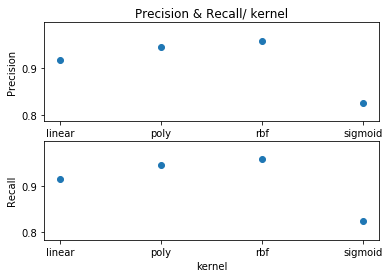

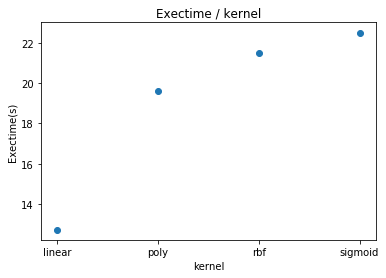

In [4]:
scores=[]
times=[]
Rec=[]
for kernel in ('linear','poly','rbf','sigmoid'):
    start=time.time()
    clf = SVC(kernel=kernel,gamma='scale')
    clf.fit(xtrain, ytrain)
    score=clf.score(xtest,ytest)
    scores.append(score)
    length=time.time()-start
    times.append(length)
    temprec=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    Rec.append(temprec)
    print("with kernel="+str(kernel)+", Precision="+str(score)+", exec time="+str(length)+", Recall="+str(temprec))

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('linear','poly','rbf','sigmoid'),scores)
ax1.set_title("Precision & Recall/ kernel")
ax1.set_ylabel("Precision")

ax2.scatter(('linear','poly','rbf','sigmoid'),Rec)
ax2.set_xlabel("kernel")
ax2.set_ylabel("Recall")

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
ax3.scatter(('linear','poly','rbf','sigmoid'),times)
ax3.set_title("Exectime / kernel")
ax3.set_xlabel("kernel")
ax3.set_ylabel("Exectime(s)")

with C =0.1, Precisiontest=0.914
with C =0.1, Precisiontrain=0.9351428571428572
with C =0.1, Recall=0.9132033615170707
with C =0.25, Precisiontest=0.9406666666666667
with C =0.25, Precisiontrain=0.9594285714285714
with C =0.25, Recall=0.939984558856281
with C =0.5, Precisiontest=0.9516666666666667
with C =0.5, Precisiontrain=0.9761428571428571
with C =0.5, Recall=0.9511119475468212
with C =0.75, Precisiontest=0.9556666666666667
with C =0.75, Precisiontrain=0.982
with C =0.75, Recall=0.9550496051603661
with C =1, Precisiontest=0.959
with C =1, Precisiontrain=0.9875714285714285
with C =1, Recall=0.9584279590757244


Text(0, 0.5, 'Exectime(s)')

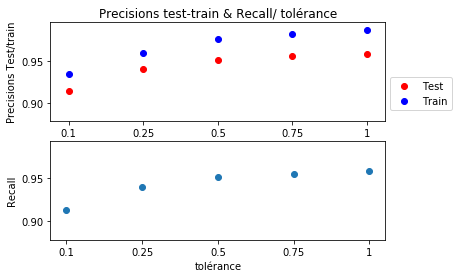

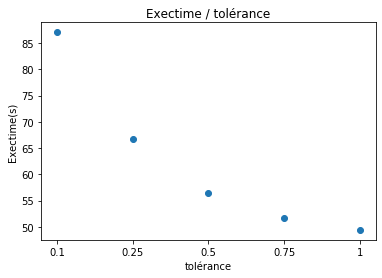

In [5]:
# erreur classification en fonction de C (sur les données de test et d'entrainement)
scoretest=[]
scoretrain=[]
times=[]
Rec=[]
for i in [0.1,0.25,0.5,0.75,1]:
    start=time.time()
    clf = SVC(C=i,gamma='scale')
    clf.fit(xtrain, ytrain)
    tempscore=clf.score(xtest,ytest)
    scoretest.append(tempscore)
    print("with C ="+str(i)+", Precisiontest="+str(tempscore))
    tempscore=clf.score(xtrain,ytrain)
    scoretrain.append(tempscore)
    print("with C ="+str(i)+", Precisiontrain="+str(tempscore))
    temprec=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    Rec.append(temprec)
    print("with C ="+str(i)+", Recall="+str(temprec))
    length=time.time()-start
    times.append(length)
    

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('0.1','0.25','0.5','0.75','1'),scoretest,c='r',label='Test')
ax1.set_title("Precisions test-train & Recall/ tolérance")
ax1.set_ylabel("Precisions Test/train")
ax1.scatter(('0.1','0.25','0.5','0.75','1'),scoretrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('0.1','0.25','0.5','0.75','1'),Rec)
ax2.set_xlabel("tolérance")
ax2.set_ylabel("Recall")

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
plt.scatter(('0.1','0.25','0.5','0.75','1'),times)
ax3.set_title("Exectime / tolérance")
ax3.set_xlabel("tolérance")
ax3.set_ylabel("Exectime(s)")

In [21]:
## matrice de confusion
metrics.confusion_matrix(ytest,clf.predict(xtest))

array([[293,   0,   0,   0,   0,   2,   1,   0,   1,   0],
       [  0, 300,   1,   1,   0,   1,   0,   0,   0,   0],
       [  1,   1, 297,   1,   3,   0,   2,   1,   3,   1],
       [  0,   1,   6, 274,   0,   4,   2,   1,   2,   0],
       [  1,   0,   0,   0, 282,   0,   3,   1,   1,   6],
       [  0,   0,   1,   7,   5, 259,   4,   0,   3,   1],
       [  1,   0,   0,   0,   0,   2, 317,   0,   0,   0],
       [  1,   3,   2,   1,   1,   0,   0, 328,   0,  10],
       [  0,   1,   2,   4,   1,   4,   1,   0, 266,   1],
       [  0,   0,   1,   1,   5,   1,   0,   5,   1, 266]])